# Assignment 2 - Bank Marketing

Link to the data: https://archive.ics.uci.edu/dataset/222/bank+marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
2) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
3) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
4) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y) by this research question:

'Which features of client demographics, marketing strategies, and external economic indicators most strongly influence the likelihood of subscribing to a bank term deposit?'


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
df_bank = pd.read_csv('Ass2Data\\bank\\bank.csv', delimiter=';')
df_bank_full = pd.read_csv('Ass2Data\\bank\\bank-full.csv', delimiter=';')
df_bank_additional = pd.read_csv('Ass2Data\\bank-additional\\bank-additional\\bank-additional.csv', delimiter=';')
df_bank_additional_full = pd.read_csv('Ass2Data\\bank-additional\\bank-additional\\bank-additional-full.csv', delimiter=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Comparison between the 4 datasets
- df_bank: 4521 rows, 17 columns
- df_bank_full: 45211 rows, 17 columns

df_bank and df_bank_full have the same columns

- df_bank_additional: 4119 rows, 21 columns.
- df_bank_additional_full: 41188 rows, 21 columns.

Columns that are in the 'additional' datasets but not in the other 2: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

# Advanced Exploratory Data Analysis 
Apply techniques from clustering and association rule mining domains.
- Data Cleaning: Outlier detection, summarizing dataset, descriptive stats, visualizations. Distribution of key variables
- AEDA: Scaling, normalization, one hot encoding, pair plots, correlation heatmaps
- Univariate and multivariate
- 2 clustering algorithms and evaluate them
- 2D plots, 3D plots
- association rules mining, evaluate them

## Data cleaning - iris
### Differnece between dataframes

In [3]:
# Define difference in columns
columns_diff = set(df_bank_additional_full.columns) - set(df_bank_full.columns)
print(columns_diff)

{'nr.employed', 'cons.conf.idx', 'cons.price.idx', 'day_of_week', 'emp.var.rate', 'euribor3m'}


Conclusion:

`df_bank_additional_full` contains the day of the week, and has the social and economic context attributes.

### Null values

In [4]:
#check for null values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No null values were recorded

### Define numerical and categorical columns

In [5]:
# Extract numerical column names
numerical_columns = df_bank.select_dtypes(include=['number']).columns.tolist()

# Extract categorical column names
categorical_columns = df_bank.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


### Data distribution and outliers

In [6]:
#show summary statistics for (numerical) data
df_bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


*Conclusions summary statistics*

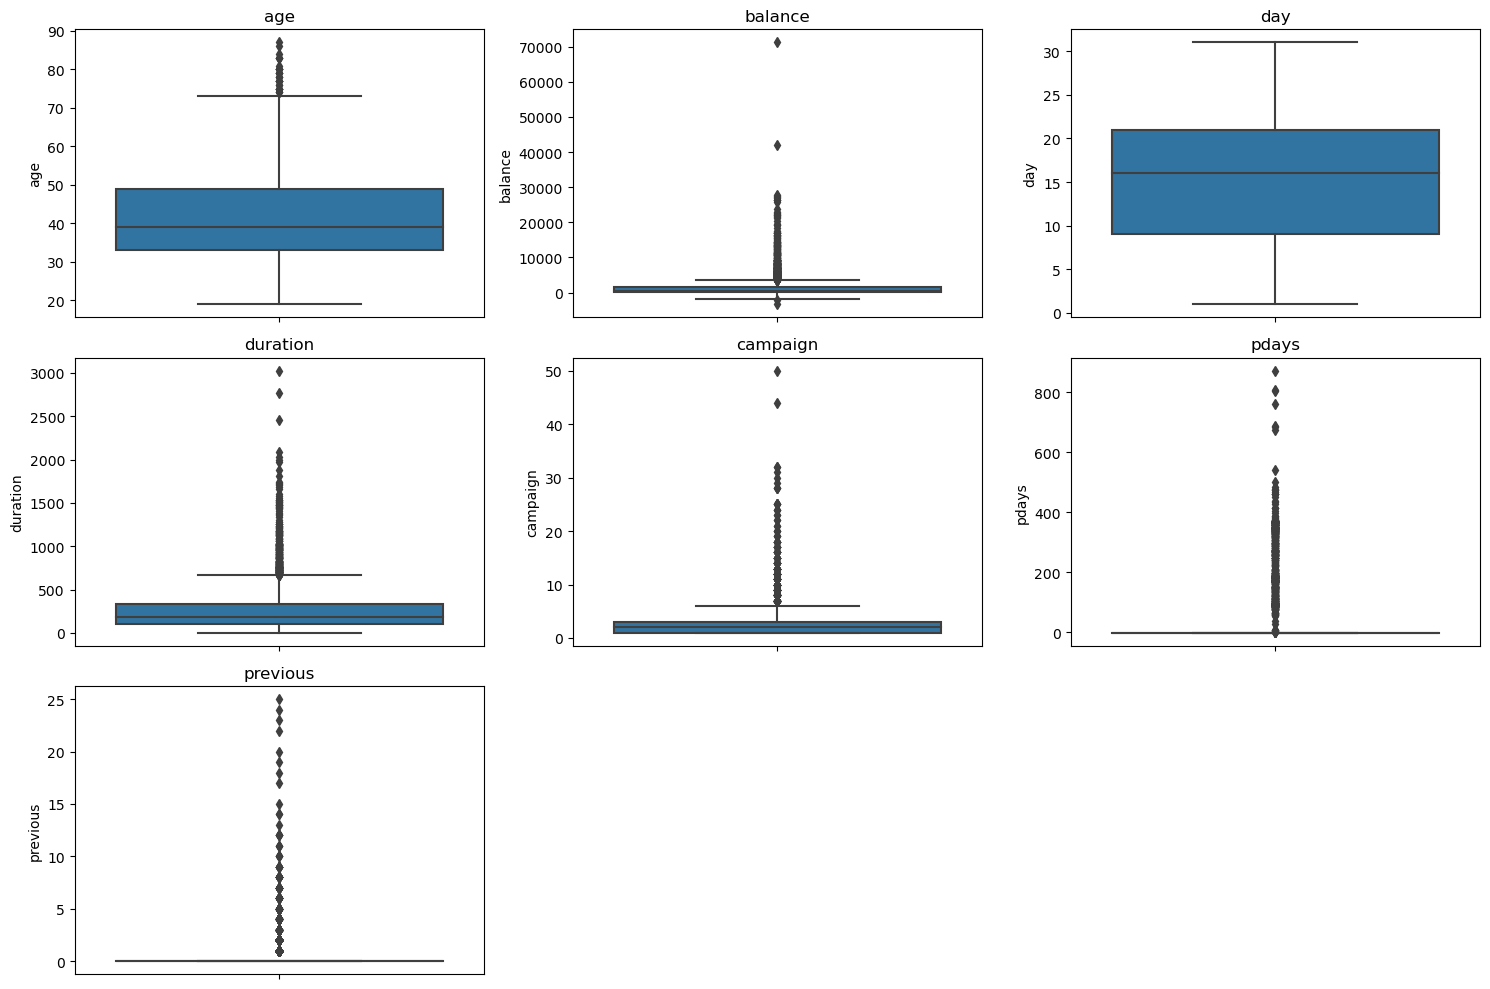

In [7]:
# create a figure with barplot subplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i)
    sns.boxplot(y=df_bank[feature], showfliers=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


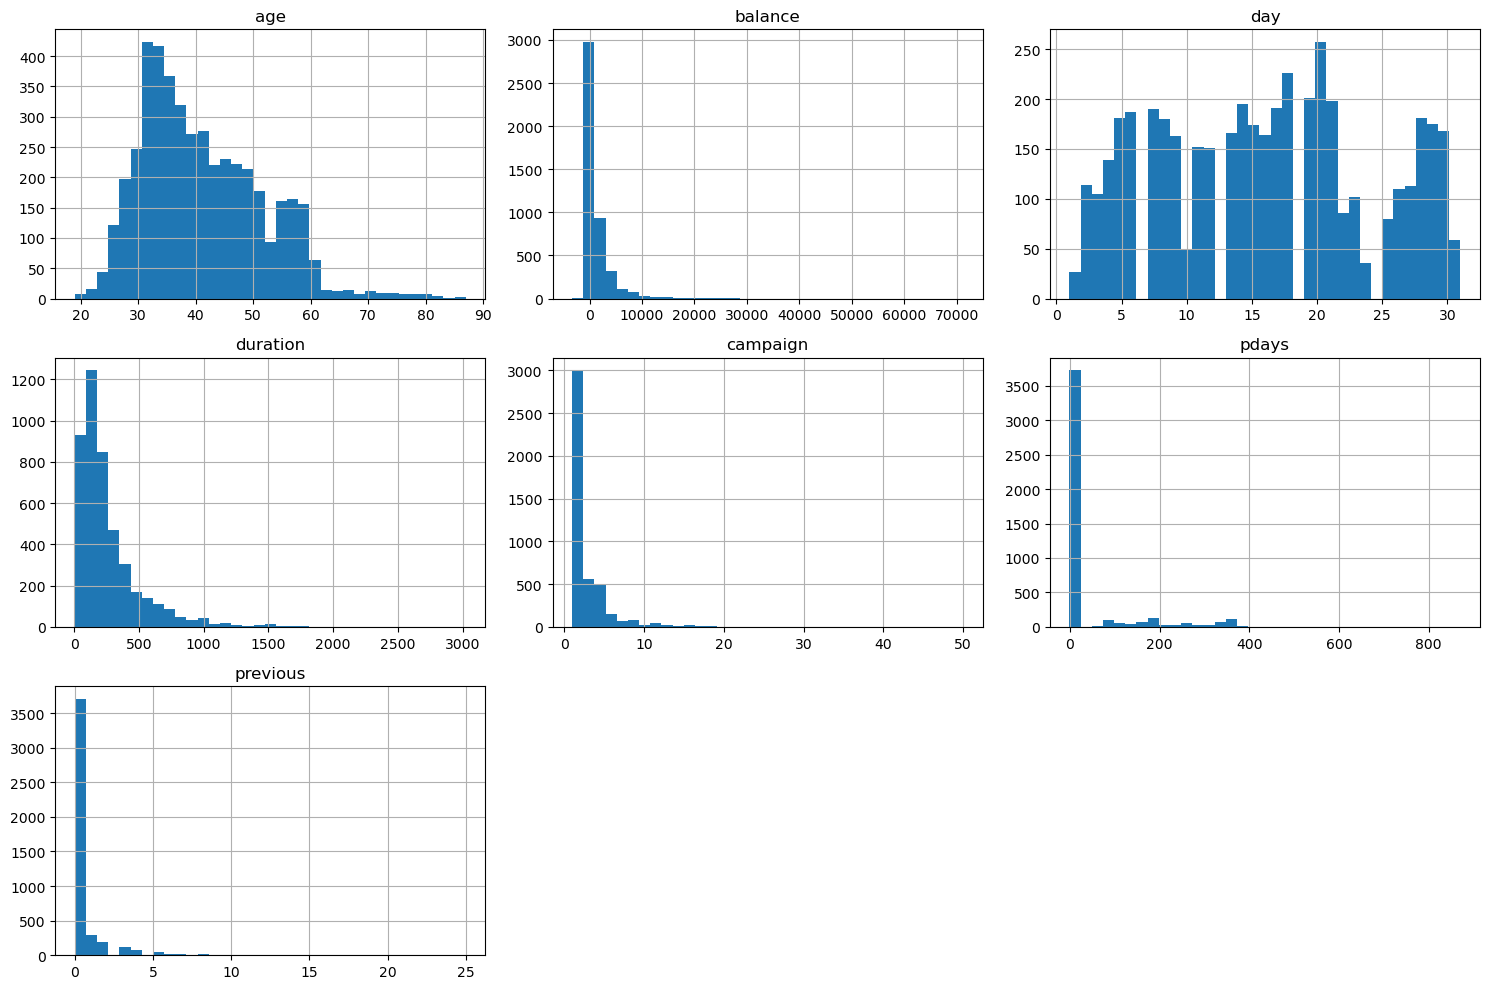

In [8]:
# create a figure with histogram subplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i)
    df_bank[feature].hist(bins=35)
    plt.title(feature)
plt.tight_layout()
plt.show()


All numerical variables, except age, day, or duration_norm, show a nonnormal distribution. This data should be normalized for furthur analysis.

## Feature engineering - iris
### Normalize numerical columns

In [9]:
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to normalize
columns_to_normalize = [col for col in numerical_columns if col not in ['age', 'day']]

# Apply the scaler to the selected columns and rename them
normalized_columns = [f"{col}_norm" for col in columns_to_normalize]
df_bank[normalized_columns] = sklearn.preprocessing.normalize(df_bank[columns_to_normalize])

print(df_bank[normalized_columns].head())

   balance_norm  duration_norm  campaign_norm  pdays_norm  previous_norm
0      0.999024       0.044165       0.000559   -0.000559       0.000000
1      0.996458       0.045776       0.000208    0.070536       0.000832
2      0.962904       0.131954       0.000713    0.235377       0.000713
3      0.991030       0.133614       0.002686   -0.000671       0.000000
4      0.000000       0.999980       0.004425   -0.004425       0.000000


C:\Users\20201222\AppData\Local\Temp\ipykernel_35044\1535843457.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(normalized_columns)//3 + 1, 3, i)
C:\Users\20201222\AppData\Local\Temp\ipykernel_35044\1535843457.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(normalized_columns)//3 + 1, 3, i)
C:\Users\20201222\AppData\Local\Temp\ipykernel_35044\1535843457.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(normalized_columns)//3 + 1, 3, i)
C:\Users\20201222\AppData\Local\Temp\ipykernel_35044\1535843457.py:6: MatplotlibDeprecationWarning: Auto-removal of ov

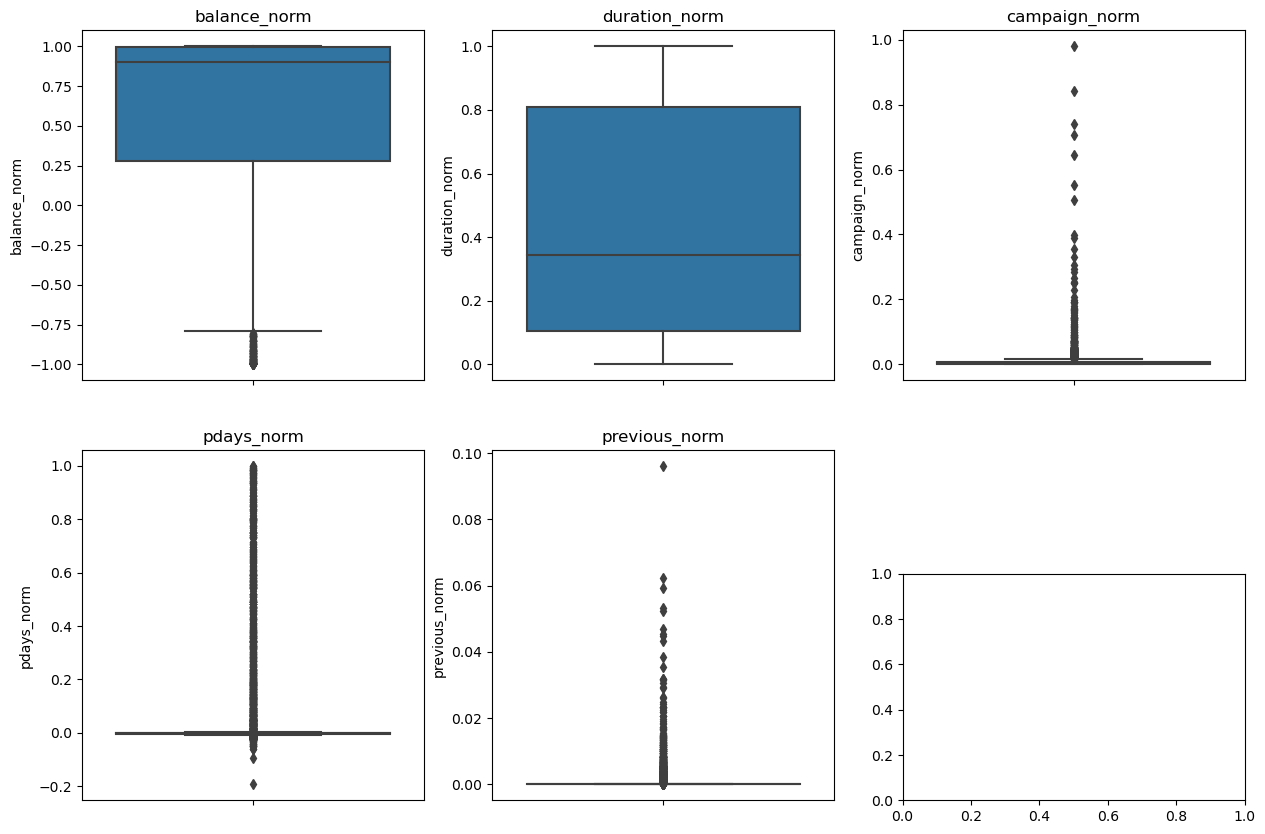

In [10]:
# Outliers for normalized columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Plot each normalized column in a separate subplot
for i, column in enumerate(normalized_columns, 1):
    plt.subplot(len(normalized_columns)//3 + 1, 3, i)
    sns.boxplot(y=df_bank[column], showfliers=True)
    plt.title(column)
plt.tight_layout()
plt.show()


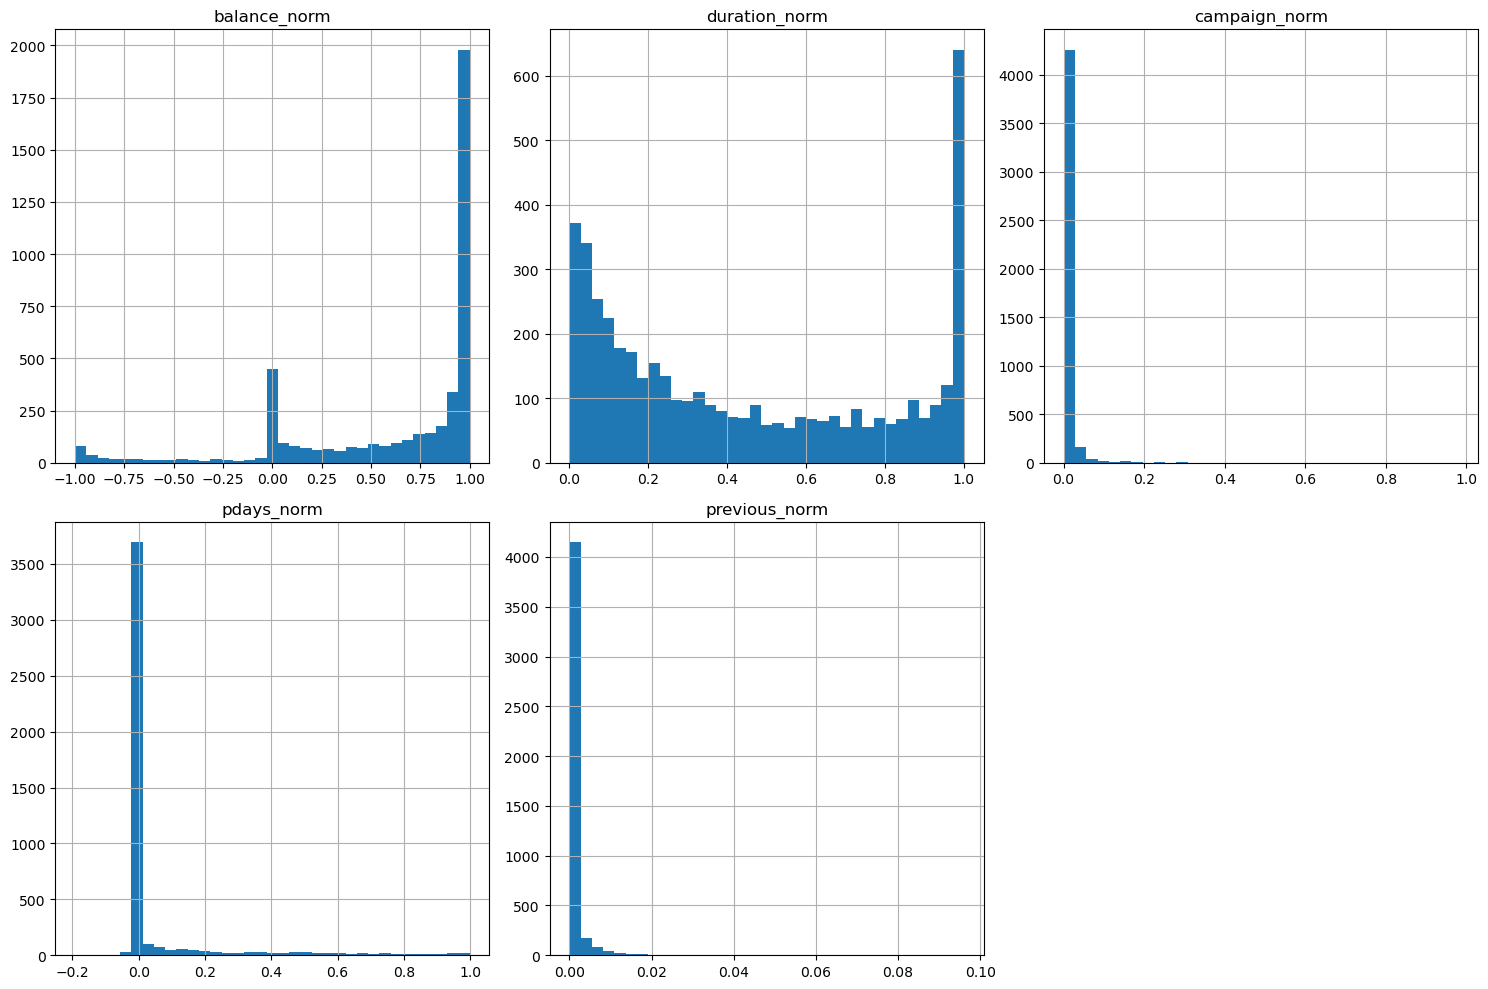

In [11]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(normalized_columns, 1):
    plt.subplot(len(normalized_columns)//3 + 1, 3, i)
    df_bank[feature].hist(bins=35)
    plt.title(feature)
plt.tight_layout()
plt.show()


### One-hot coding of categorical features

In [12]:
# Apply one-hot encoding to categorical columns
df_bank_encoded = pd.get_dummies(df_bank, columns=categorical_columns)

print(df_bank_encoded.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'balance_norm', 'duration_norm', 'campaign_norm', 'pdays_norm',
       'previous_norm', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dt

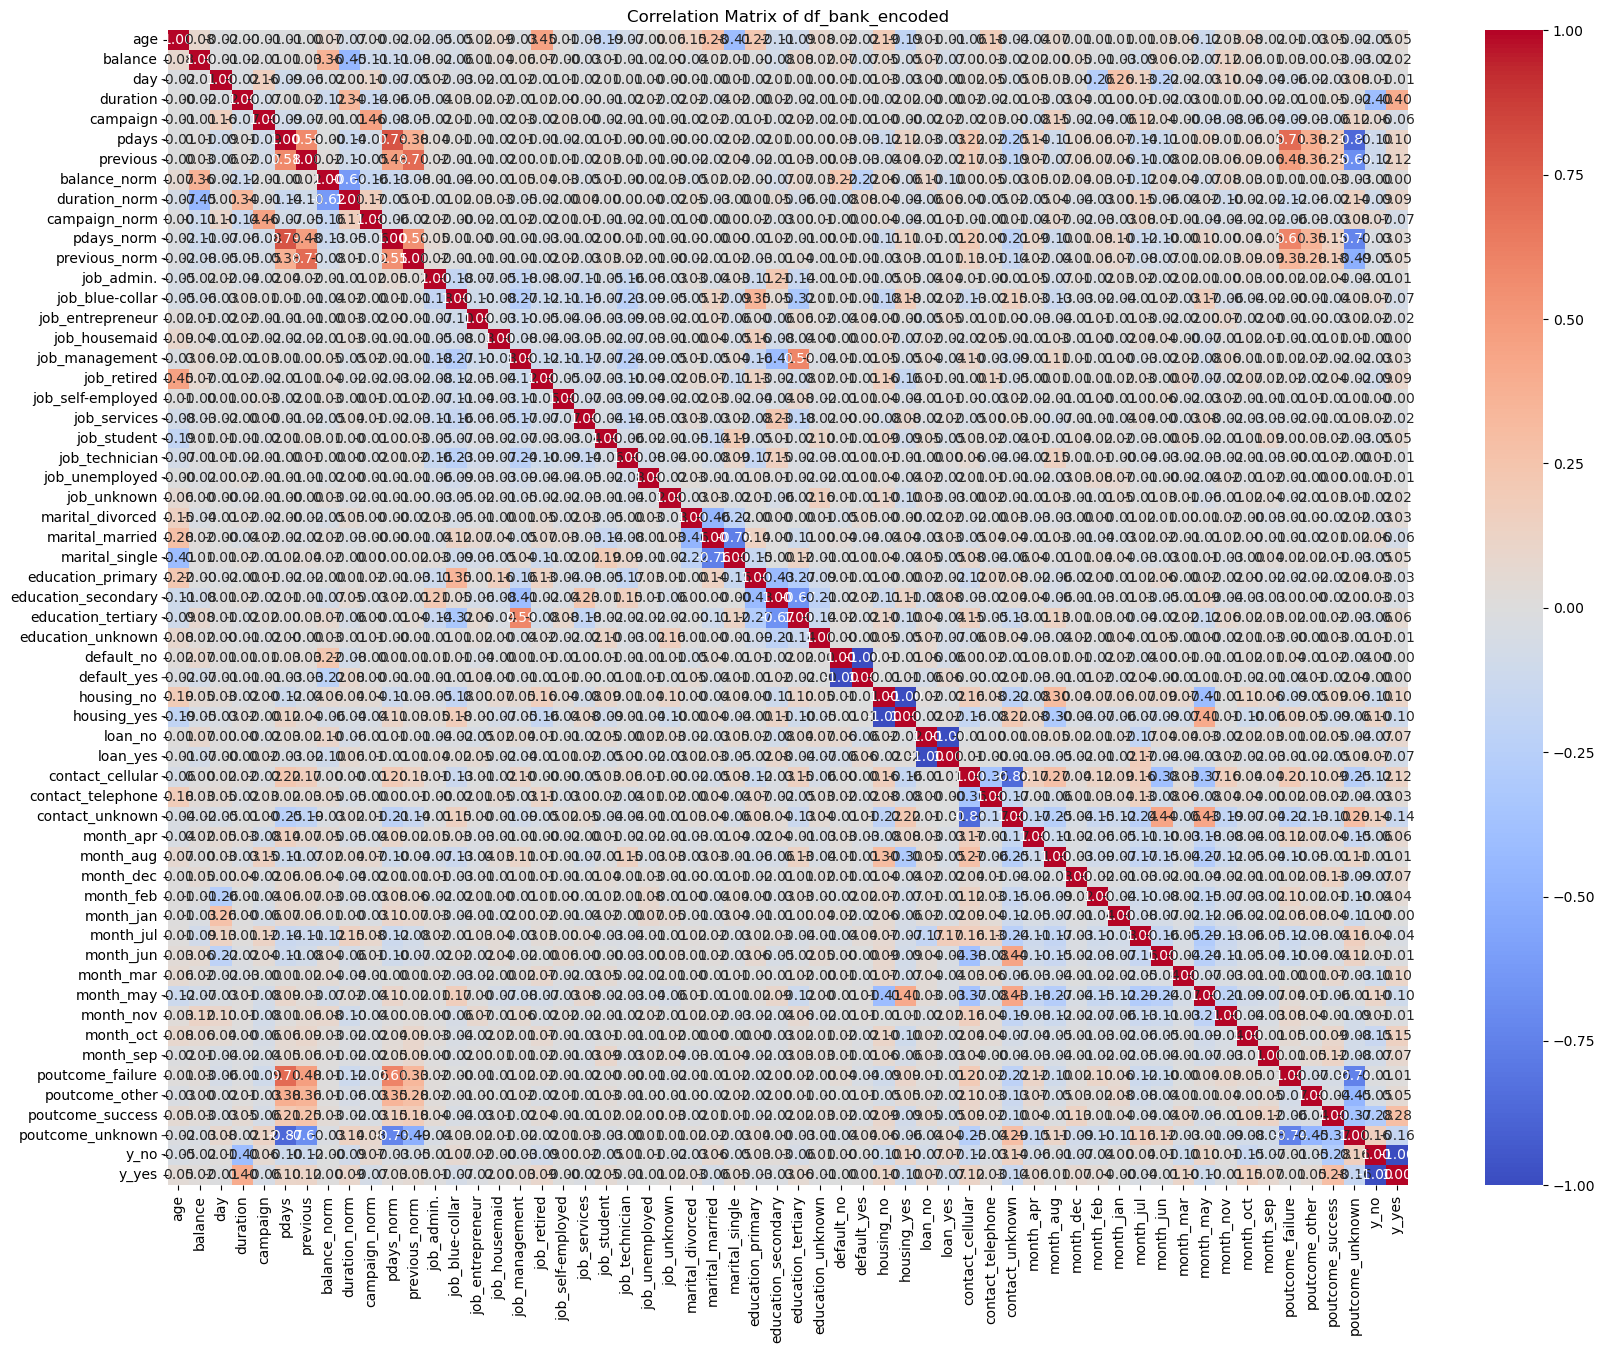

In [13]:
# Calculate the correlation matrix
correlation_matrix = df_bank_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of df_bank_encoded')
plt.show()

In [14]:
# Calculate the correlation matrix for the target variable 'y' and other features
y_corr = df_bank_encoded.corr()[['y_yes', 'y_no']]

print(y_corr)

                        y_yes      y_no
age                  0.045092 -0.045092
balance              0.017905 -0.017905
day                 -0.011244  0.011244
duration             0.401118 -0.401118
campaign            -0.061147  0.061147
pdays                0.104087 -0.104087
previous             0.116714 -0.116714
balance_norm         0.003707 -0.003707
duration_norm        0.086204 -0.086204
campaign_norm       -0.069121  0.069121
pdays_norm           0.026175 -0.026175
previous_norm        0.053842 -0.053842
job_admin.           0.006568 -0.006568
job_blue-collar     -0.068147  0.068147
job_entrepreneur    -0.015968  0.015968
job_housemaid        0.004872 -0.004872
job_management       0.032634 -0.032634
job_retired          0.086675 -0.086675
job_self-employed   -0.003827  0.003827
job_services        -0.024071  0.024071
job_student          0.047809 -0.047809
job_technician      -0.010154  0.010154
job_unemployed      -0.007312  0.007312
job_unknown          0.019886 -0.019886


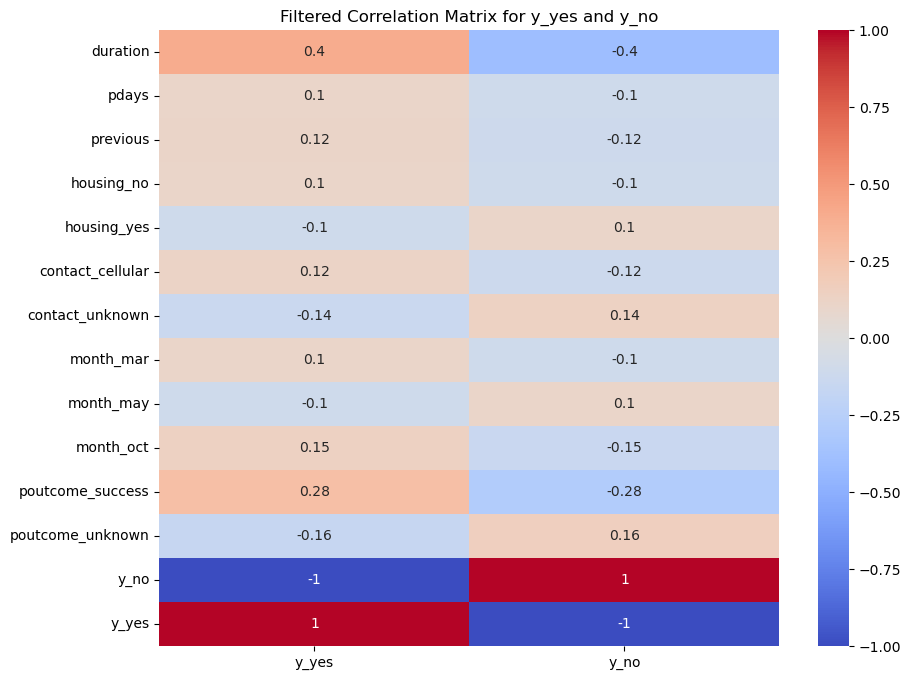

In [15]:
# Filter the correlation matrix for y_no and y_yes where the absolute value of correlation is higher than 0.1
filtered_corr_matrix = y_corr[(y_corr['y_yes'].abs() > 0.1)]

# Plot the heatmap for the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Filtered Correlation Matrix for y_yes and y_no')
plt.show()

The highest correalted features with `y_yes` are duration, pdays, previous (numerical), and poutcome_success, month_oct, and contact_cellular (categorical).

In [16]:
key_features = ['duration', 'pdays', 'previous', 'poutcome_success', 'month_oct', 'contact_cellular']

c:\Users\20201222\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


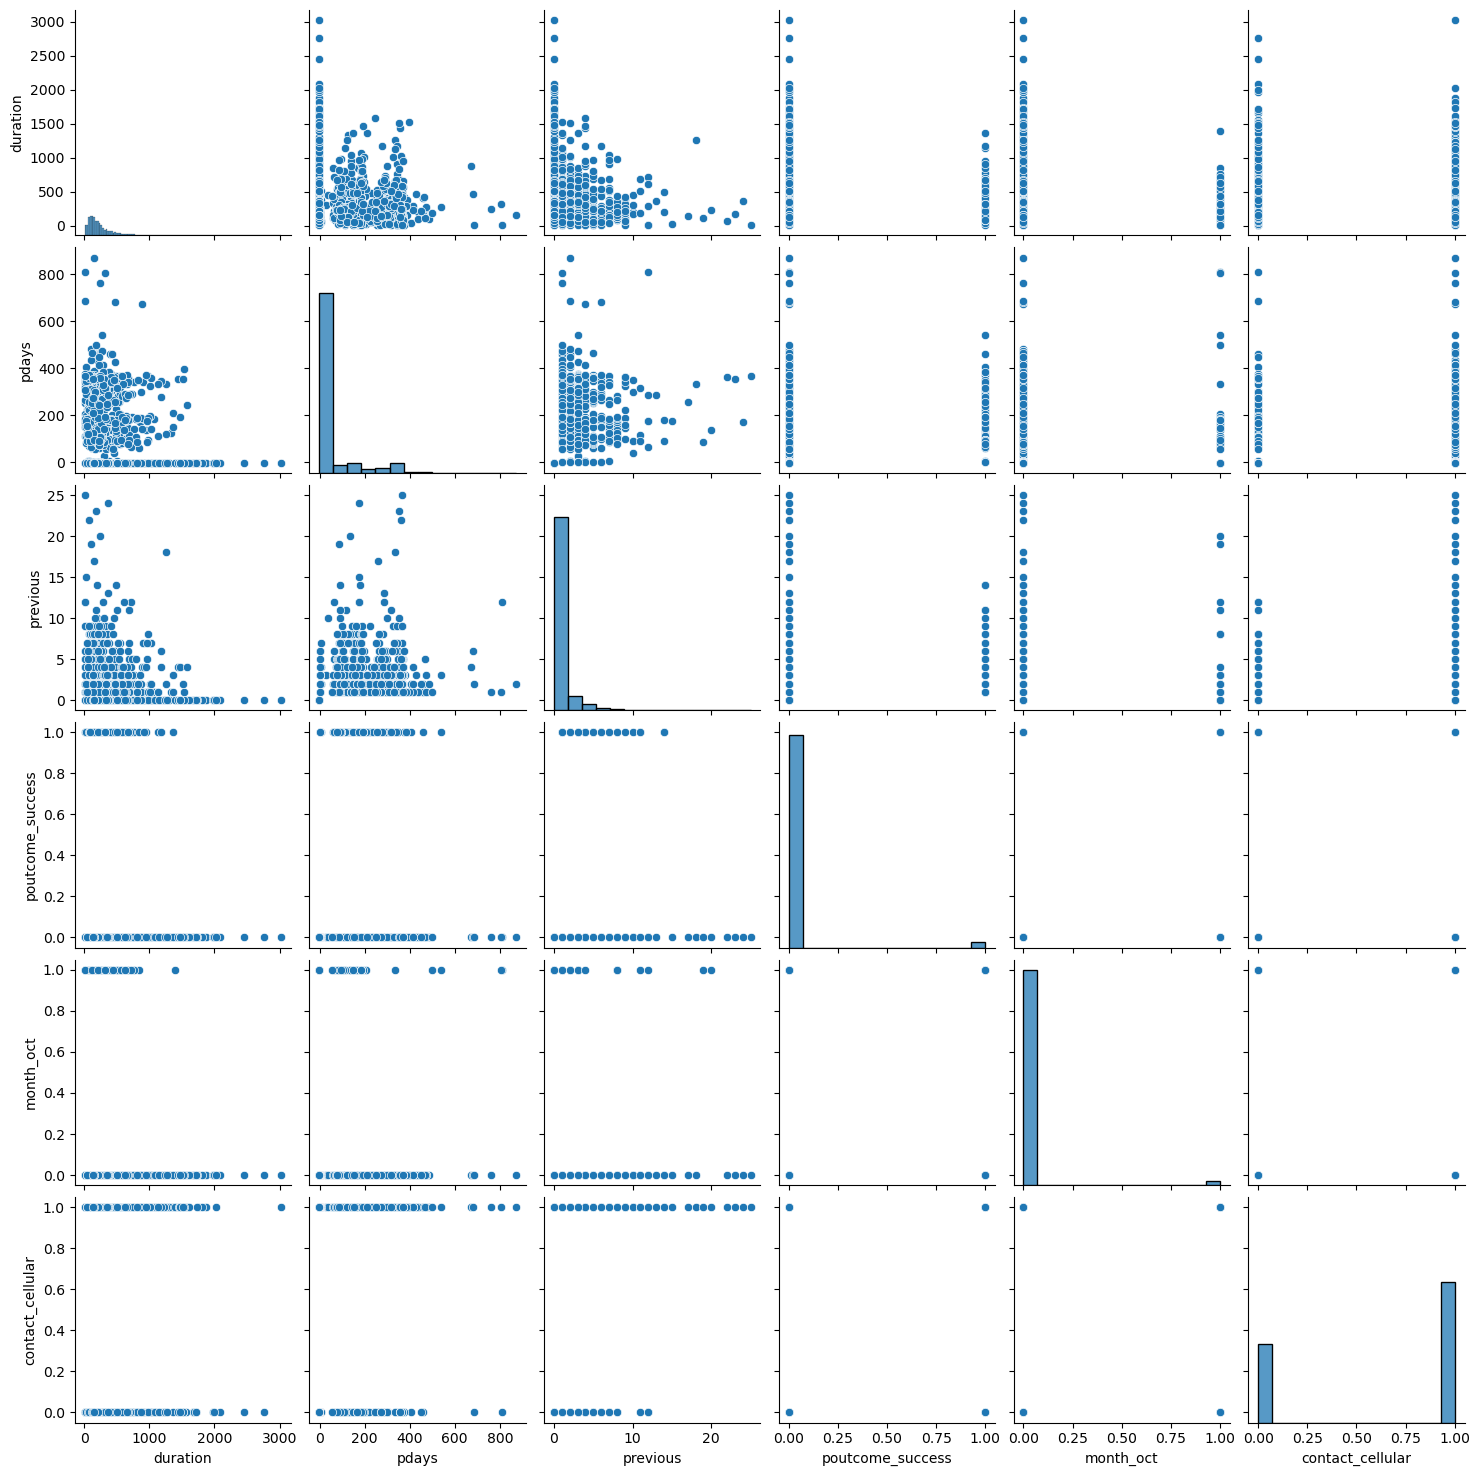

In [17]:
# Create pair plots
sns.pairplot(df_bank_encoded[key_features])
plt.show()

### Standardize y
There are way more y_nos than y_yes. We should standarize this value.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Initialize the StandardScaler
scaler_y = StandardScaler()

# Fit and transform the y_yes column
df_bank_encoded['y_yes_standardized'] = scaler_y.fit_transform(df_bank_encoded[['y_yes']])

# Balance the dataset by oversampling the minority class (y_yes)

# Separate majority and minority classes
# Separate majority and minority classes
df_majority = df_bank_encoded[df_bank_encoded.y_yes == 0]
df_minority = df_bank_encoded[df_bank_encoded.y_yes == 1]
print("y_yes count:", df_minority.shape[0])
print("y_no count:", df_majority.shape[0])

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.y_yes.value_counts())

y_yes count: 521
y_no count: 4000
0    4000
1    4000
Name: y_yes, dtype: int64


## Clustering

In this section, we will be applying two clustering algorithms to the data: DBSCAN and Fuzzy C-Means Clustering. We chose to use DBSCAN because we saw from the EDA that we have a lot of outliers in our attributes. The decision for Fuzzy C-Means Clustering was made as we expect high overlap between the clusters, which this clustering method works well for.

### Cluster algorithm 1 KNN - DBSCAN

<Axes: ylabel='age'>

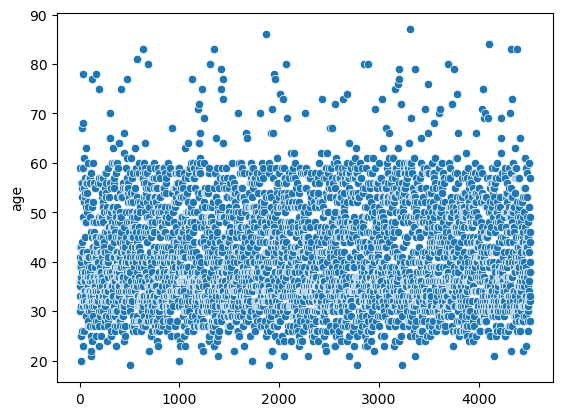

In [19]:
sns.scatterplot(df_bank['age'])

### Cluster algorithm 2  - Fuzzy C-Means Clustering

In [21]:
# Redefining the cluster_range and accuracies for plotting process
cluster_range = range(1,11)
accuracies = []
all_clusters = []
data = df_upsampled[key_features]

# Perform Fuzzy C-Means clustering for each number of clusters
for n_clusters in cluster_range:
    # Perform fuzzy C-means clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, 2, error=0.005, maxiter=1000)
    
    # Assign clusters based on the highest membership
    clusters = np.argmax(u, axis=0)
    all_clusters.append(clusters)

print(all_clusters)

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([1, 1, 1, ..., 1, 1, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 2], dtype=int64), array([2, 2, 2, ..., 3, 2, 1], dtype=int64), array([4, 1, 1, ..., 1, 4, 0], dtype=int64), array([0, 2, 2, ..., 2, 0, 5], dtype=int64), array([0, 2, 2, ..., 2, 6, 3], dtype=int64), array([5, 4, 4, ..., 4, 6, 1], dtype=int64), array([1, 6, 6, ..., 6, 8, 7], dtype=int64), array([6, 7, 7, ..., 7, 4, 1], dtype=int64)]


c:\Users\20201222\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


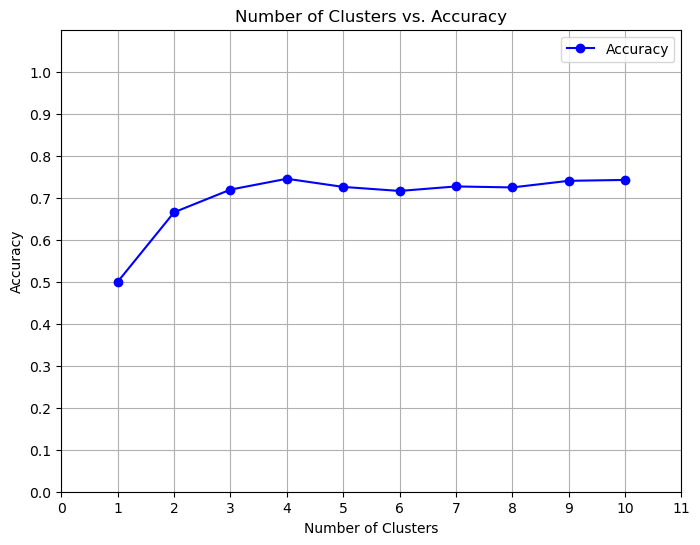

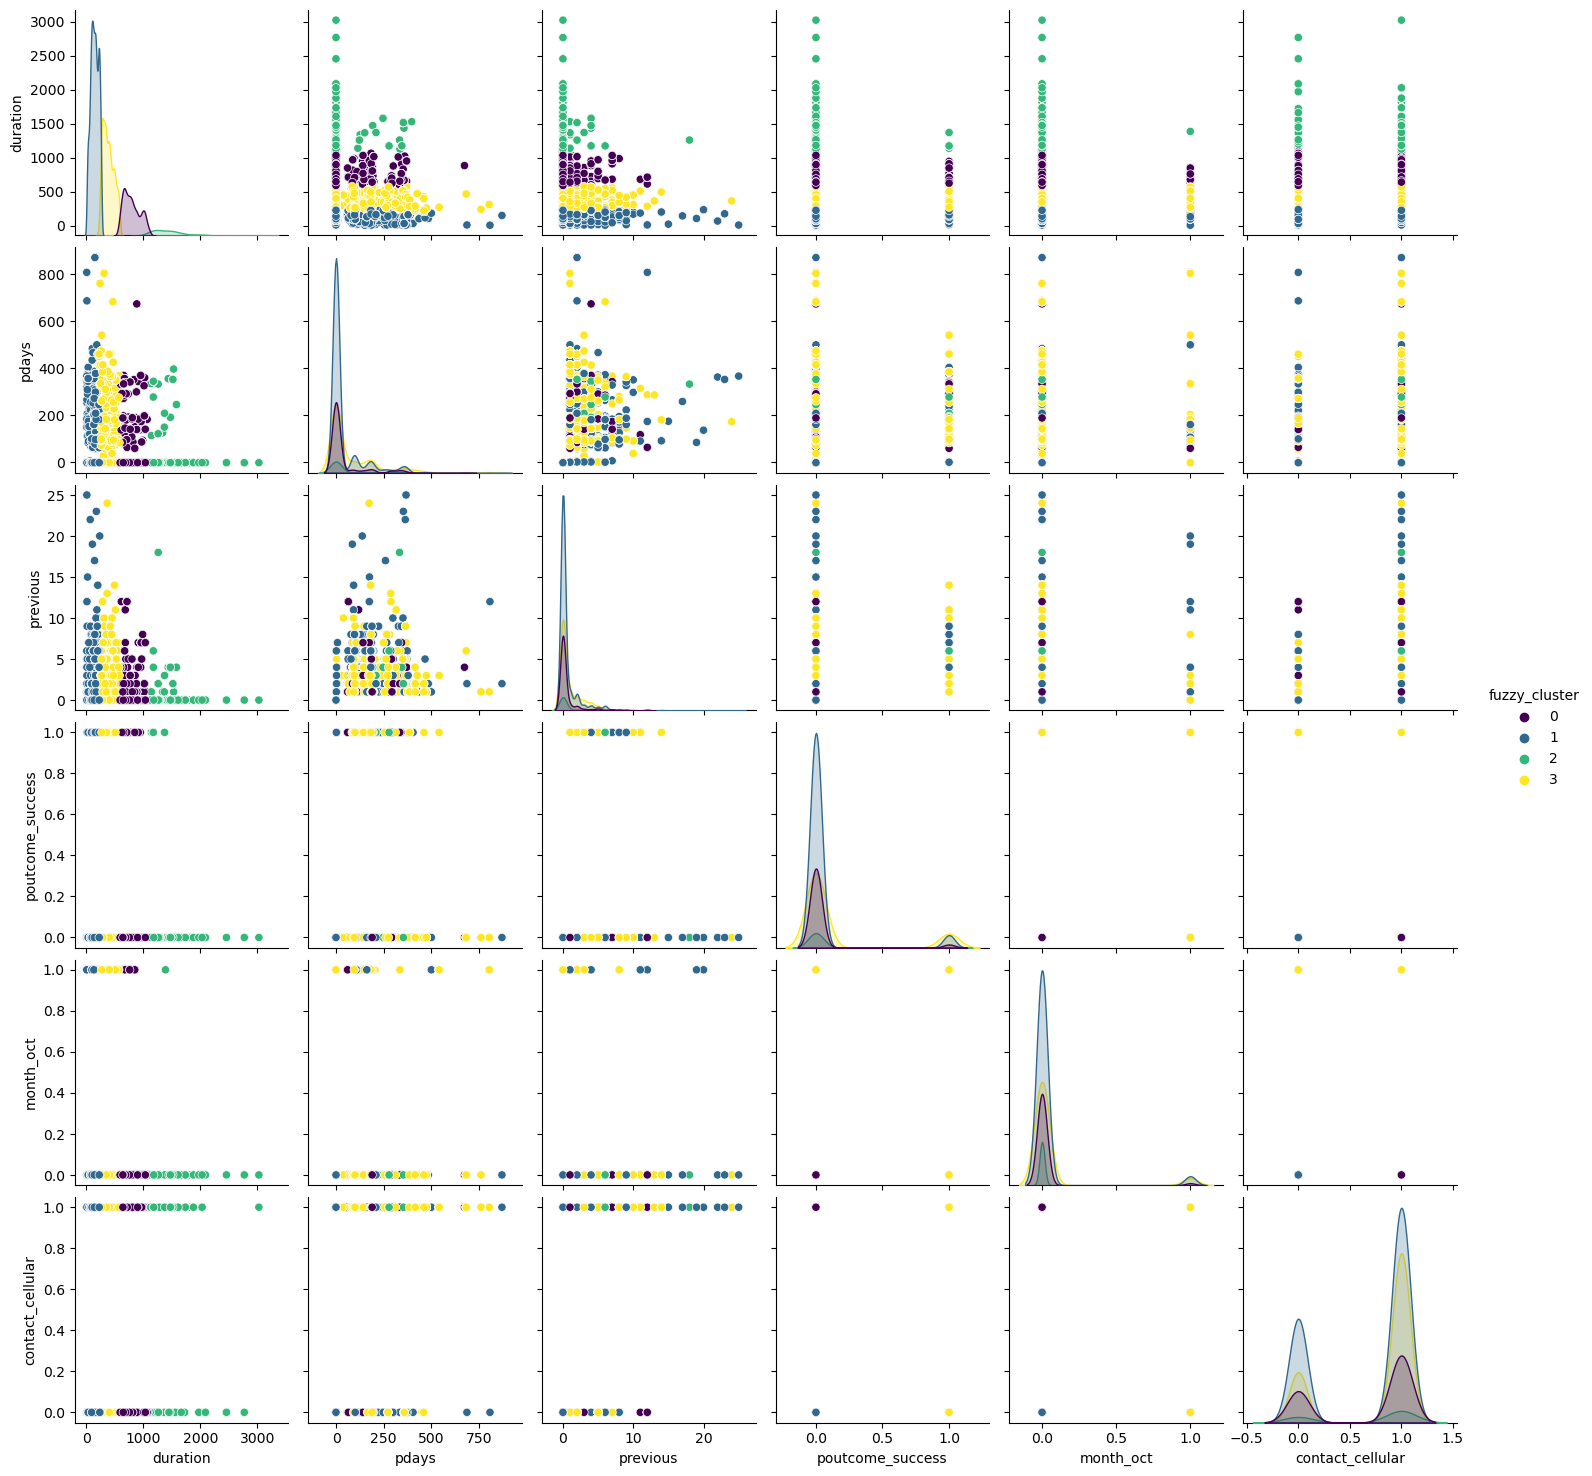

Clustering Accuracies: [0.5, 0.665375, 0.719375, 0.745125, 0.72575, 0.716125, 0.726875, 0.7245, 0.74025, 0.742375]


In [22]:
from sklearn.metrics import confusion_matrix

true_labels = df_upsampled['y_yes']

# Calculate accuracies for each clustering result
for clusters in all_clusters:
    # Using sklearn's confusion_matrix to generate the contingency matrix
    contingency_matrix = confusion_matrix(true_labels, clusters)
    
    # For each cluster, find the maximum true label count
    correct_predictions = sum(np.max(contingency_matrix, axis=0))

    # Calculate accuracy
    accuracy = correct_predictions / len(true_labels)
    accuracies.append(accuracy)


# Perform fuzzy c-means clustering with 4 clusters
n_clusters_4 = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters_4, 2, error=0.005, maxiter=1000)
clusters4 = np.argmax(u, axis=0)

# Add the cluster assignment to the dataframe
df_upsampled['fuzzy_cluster'] = clusters4

# Plotting number of clusters vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, accuracies, marker='o', color='b', label="Accuracy")
plt.title("Number of Clusters vs. Accuracy")
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy")
plt.xlim(0, 11)  # Setting x-axis limit
plt.ylim(0, 1.1)  # Setting y-axis limit
plt.xticks(range(0, 12))  # Setting x-ticks every 1 increment
plt.yticks(np.arange(0, 1.1, 0.1))  # Setting y-ticks every 0.1 increment
plt.grid()
plt.legend()

# Plot the clusters using pairplot
sns.pairplot(df_upsampled, vars=key_features, hue='fuzzy_cluster', palette='viridis')
plt.show()

# Print final clustering accuracy
print("Clustering Accuracies:", accuracies)

In [26]:
df_upsampled[key_features + ['y_yes', 'fuzzy_cluster']]

,duration,pdays,previous,poutcome_success,month_oct,contact_cellular,y_yes,fuzzy_cluster
0,79,-1,0,0,1,1,0,1
1,220,339,4,0,0,1,0,1
2,185,330,1,0,0,1,0,1
3,199,-1,0,0,0,0,0,1
4,226,-1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
382,234,-1,0,0,0,0,1,1
1574,138,-1,0,0,0,1,1,1
3250,269,541,3,1,1,1,1,3
84,224,-1,0,0,0,1,1,1


In [27]:
# return cluster centers cntr 
print(f"Clusters centers: {cntr}")
# return membership matrix u
print(f"Memership matrix: {u}")

Clusters centers: [[7.81380574e+02 2.67251927e+01 4.85496060e-01 3.56380565e-02
  2.94448441e-02 6.66472369e-01]
 [1.37724706e+02 2.55125620e+01 4.68051948e-01 4.92094677e-02
  3.88639043e-02 6.62201936e-01]
 [1.45590493e+03 3.79074559e+01 5.39510341e-01 2.18752263e-02
  5.39835230e-03 6.79820556e-01]
 [3.76654292e+02 5.39167503e+01 9.27666088e-01 1.34969472e-01
  5.66393600e-02 7.54560416e-01]]
Memership matrix: [[0.00795946 0.11009724 0.10059365 ... 0.1887697  0.01950565 0.56483723]
 [0.94704025 0.43247816 0.47426322 ... 0.35157773 0.74568793 0.09469111]
 [0.00207277 0.02807841 0.02648036 ... 0.05986421 0.00399899 0.03814265]
 [0.04292752 0.42934619 0.39866278 ... 0.39978836 0.23080743 0.302329  ]]


## Association rules - Aurelia

# Predictive Modelling


SVM (Kyrie)

XGBoost (Onno)

AAAAAAHHHH

In [ ]:
#Import necessary libraries for XGBoost



Random Forest (Mila)

# Comparison between the 3 models